In [1]:
from fastai import *
from fastai.vision import *
import zipfile

In [2]:
zip = zipfile.ZipFile('intel-image-classification.zip')
zip.extractall()
zip.close()

In [3]:
PATH = Path("/home/richardjunio39/intel-image-classification/")

In [4]:
bs = 64
#bs = 32   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [5]:
data = ImageDataBunch.from_folder(PATH, train='seg_train', valid='seg_test', ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)


In [6]:
data

ImageDataBunch;

Train: LabelList (14034 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
street,street,street,street,street
Path: /home/richardjunio39/intel-image-classification;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
street,street,street,street,street
Path: /home/richardjunio39/intel-image-classification;

Test: None

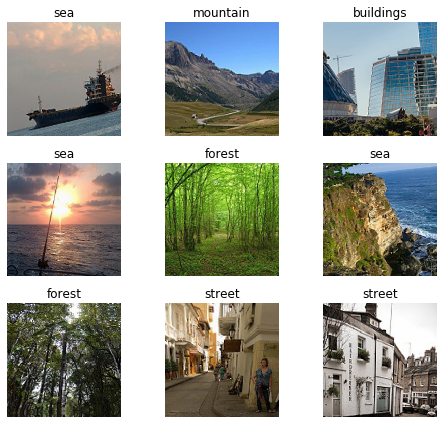

In [7]:
data.show_batch(rows=3, figsize=(7,6))

In [8]:
print(data.classes)
len(data.classes),data.c

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


(6, 6)

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.440582,0.321386,0.108667,01:50
1,0.310179,0.254227,0.096667,01:48
2,0.245831,0.207749,0.078000,01:49
3,0.207804,0.194517,0.073000,01:48
4,0.178209,0.177105,0.066000,01:48


In [12]:
learn.save('stage-1')

In [13]:
learn = learn.load('stage-1')

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time


In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.163192,0.183504,0.066000,02:35
1,0.175639,0.164298,0.061000,02:41
2,0.117218,0.161561,0.057000,02:41
3,0.084017,0.161264,0.057000,02:41


In [18]:
learn.save('stage-2')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

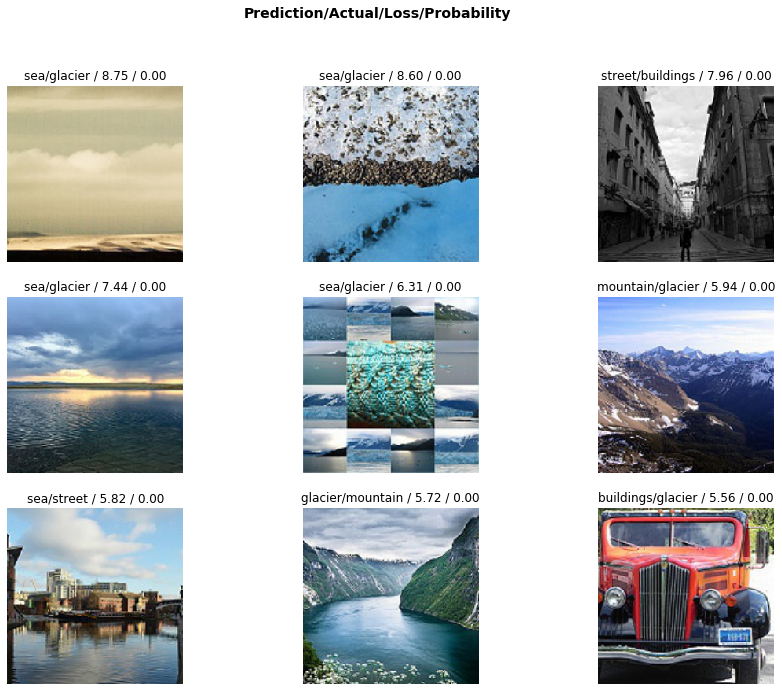

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

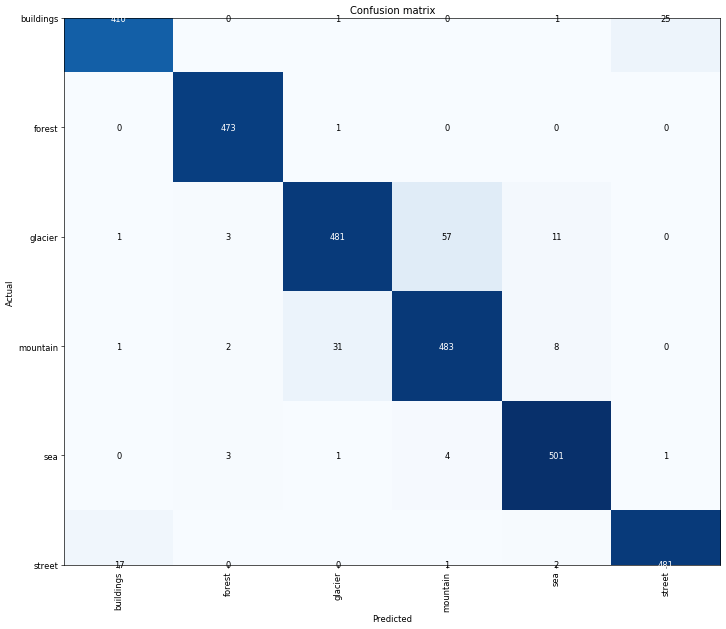

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
interp.most_confused(min_val=2)

[('glacier', 'mountain', 57),
 ('mountain', 'glacier', 31),
 ('buildings', 'street', 25),
 ('street', 'buildings', 17),
 ('glacier', 'sea', 11),
 ('mountain', 'sea', 8),
 ('sea', 'mountain', 4),
 ('glacier', 'forest', 3),
 ('sea', 'forest', 3),
 ('mountain', 'forest', 2),
 ('street', 'sea', 2)]